In [2]:
#-*- coding:utf-8 -*-

import time
import pandas as pd
import numpy as np 
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from matplotlib.font_manager import FontProperties

# reload(sys)
# sys.setdefaultencoding('utf8')

font = FontProperties(fname=r"C:\\WINDOWS\\Fonts\\simsun.ttc", size=14)
df = pd.read_csv('D:\my_documents\python\scrape\house_price\leju\house_info.csv',encoding='gbk')

data = df[df['house_type']==16]
# columns = ['ID',u'标题',u'总价',u'每平米单价',u'房屋类型',u'产权',u'面积',u'装修',u'朝向',u'物业费',u'地址',u'小区',u'市',u'区',u'建成年',u'开发商',u'物业',u'楼盘总面积',u'户数',u'停车位数',u'绿化率',u'容积率',u'卧室数量',u'客厅数量',u'卫浴数量',u'所在楼层',u'总楼层',u'一房',u'两房',u'三房',u'四房',u'五房',u'五房以上',u'100万以下',u'100万-200万',u'200万-300万',u'300万-500万',u'500万-800万',u'800万-1000万',u'1000万以上']
# print len(columns)
# data.columns = columns

data.shape
# data.head()

(15553, 40)

In [10]:
data.ix[:,1:].describe()

,total_price,unit_price,house_type,propriety,area,direction,management_fee,year,total_square,num_family,...,room4,room5,room6,_range1,_range2,_range3,_range4,_range5,_range6,_range7
count,17764.000000,17764.000000,17758.000000,9306.000000,17764.000000,17166.000000,16523.000000,6089.000000,1.683000e+04,16260.000000,...,13873.000000,8399.000000,4080.000000,13725.000000,13687.000000,10375.000000,8355.000000,5774.000000,2836.000000,3984.000000
mean,283.944551,21318.015368,15.560649,3.944552,108.938508,5.625422,5.846938,2011.228445,5.736338e+05,2420.617774,...,57.184459,28.228956,11.039706,170.600291,121.389713,42.053012,44.195572,20.468479,14.798307,51.868223
std,571.046409,18781.042190,2.032736,0.352376,82.729366,1.871980,145.139968,5.936137,1.140029e+06,3325.055375,...,80.263592,54.141267,16.515266,276.720641,181.569057,69.461073,82.725890,33.458040,24.789802,137.204550
min,10.000000,2256.000000,1.000000,1.000000,4.000000,1.000000,0.080000,1970.000000,1.000000e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,73.000000,9150.500000,NaN,NaN,73.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,126.000000,14851.000000,NaN,NaN,91.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,260.000000,27867.000000,NaN,NaN,115.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,17200.000000,361538.000000,17.000000,5.000000,2460.000000,10.000000,14000.000000,2018.000000,5.657000e+07,40000.000000,...,414.000000,244.000000,105.000000,1621.000000,853.000000,289.000000,367.000000,174.000000,118.000000,662.000000


In [70]:
##Distribution of Total Price (price below 10,000,000)

print 1.0*data['total_price'][data['total_price']<=1000].count()/data['total_price'].count()
plt.figure(figsize=(6,4))
sns.distplot(data['total_price'][data['total_price']<=1000],kde=False,color='b',hist_kws={'alpha':0.8})
plt.title('Distribution of Total Price (price below 10,000,000)')
plt.ylabel('Number')
# plt.show()

In [71]:
#Distribution of unit Price

plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(data['unit_price'][data['unit_price']<=100000],kde=False,color='b',hist_kws={'alpha':0.8})#
plt.title('Distribution of Unit Price')
plt.ylabel('Number')
ax2 = plt.subplot(1,2,2)
sns.distplot(data['unit_price'][data['unit_price']<=60000],kde=False,color='b',hist_kws={'alpha':0.8})#
plt.title('Distribution of Unit Price (Zoomed In)')
plt.ylabel('Number')
# plt.show()

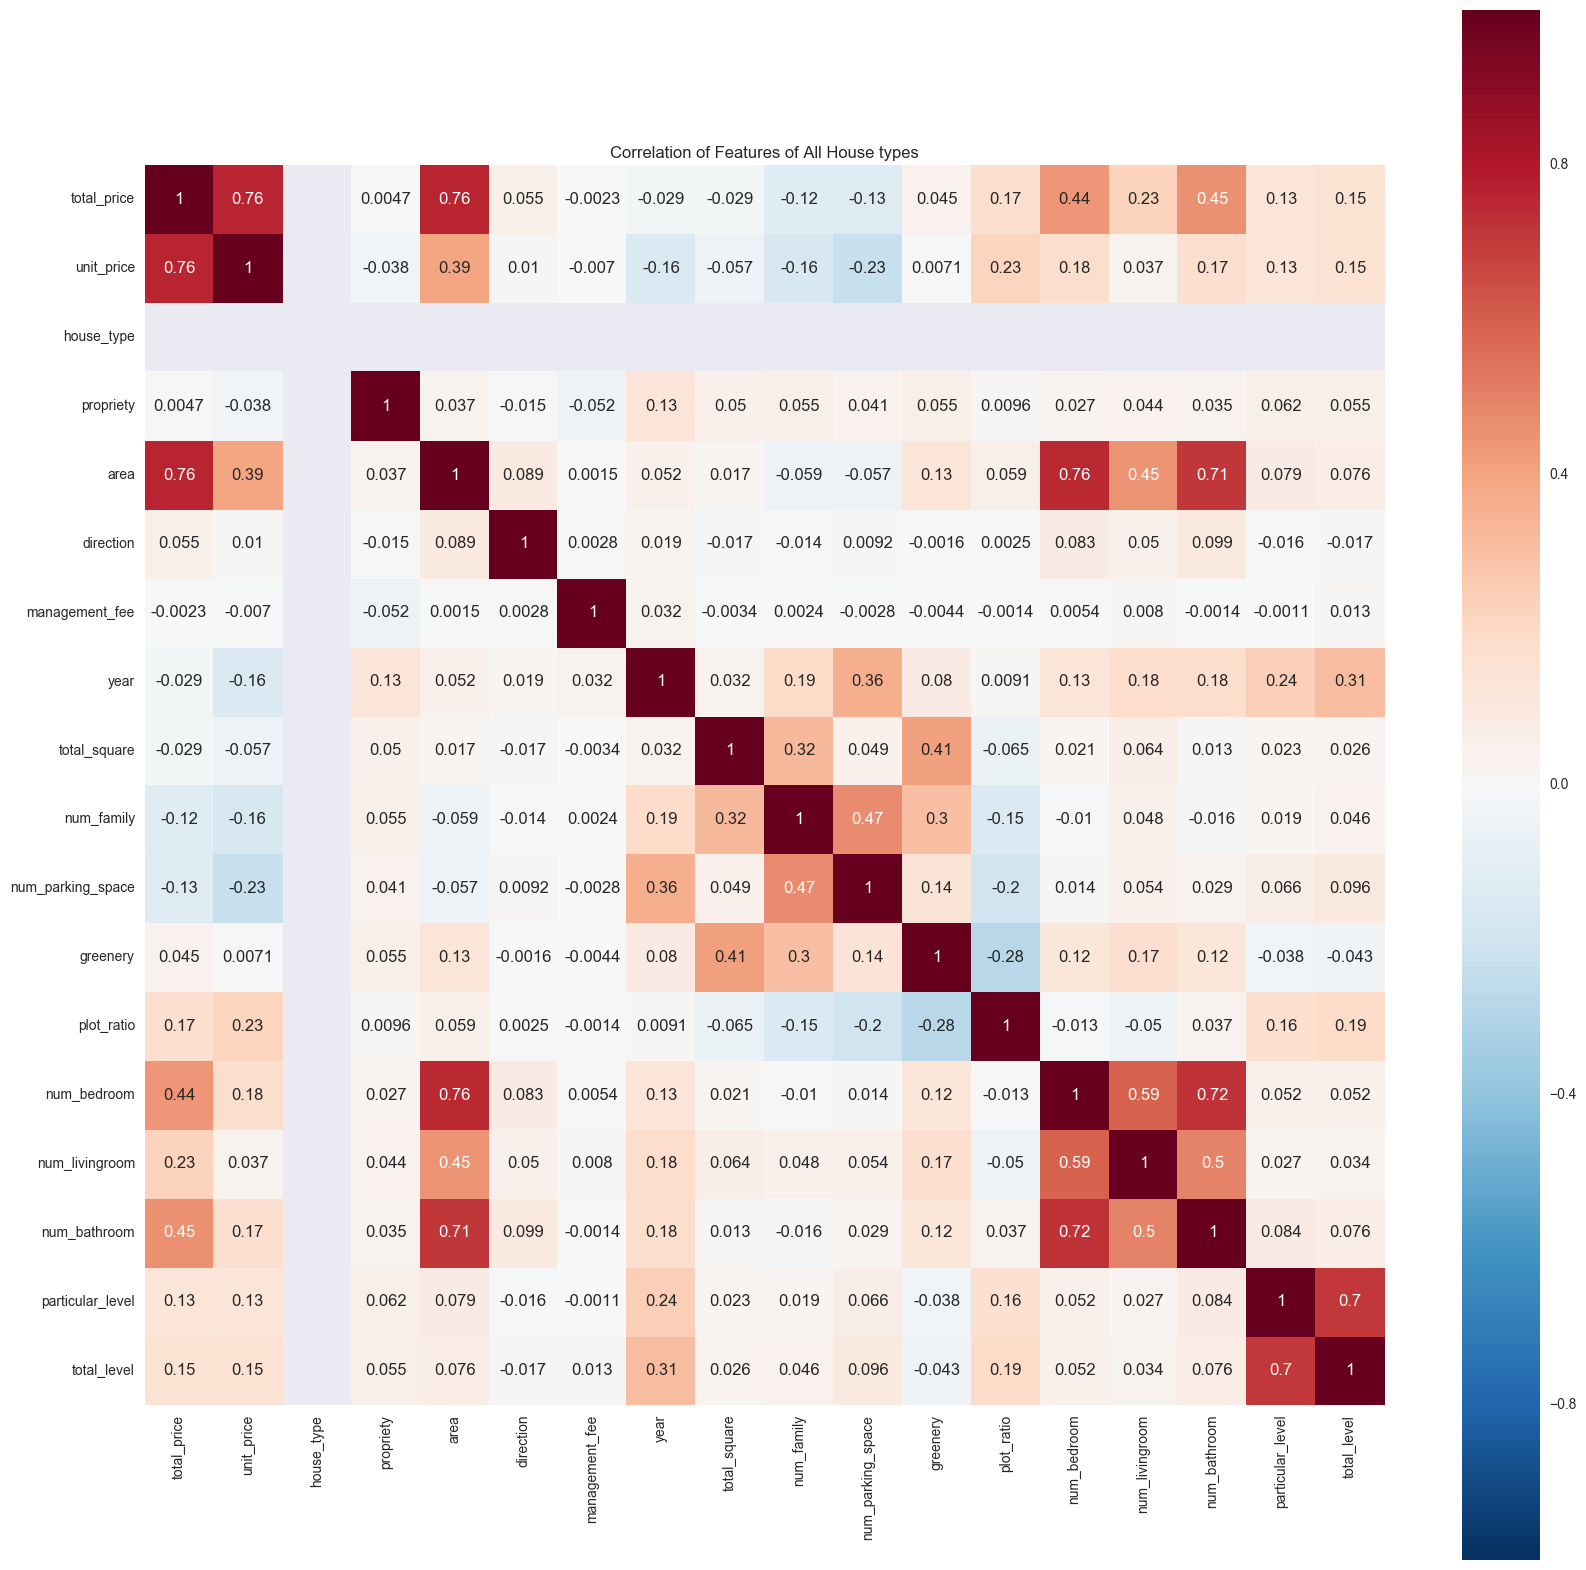

In [21]:
## Correlation
plt.figure(figsize=(20,20))
corr = data.select_dtypes(include=['float64','int64']).ix[:,1:-13].corr()#[data['area']<=200].corr()
sns.heatmap(corr,annot=True,linecolor='k',cbar=True,square=True)#,fontproperties=font)
plt.title('Correlation of Features of All House types')
plt.show()

In [35]:
## Correlation housetype=16 普通住宅
plt.figure(figsize=(20,20))
corr = data.select_dtypes(include=['float64','int64']).ix[:,1:-13].corr()
sns.heatmap(corr,annot=True,linecolor='k',cbar=True,square=True)
plt.title('Correlation of Features of All House types')


In [73]:
##
k = 9
cols = corr.nlargest(k,'total_price')['total_price'].index
df = data[cols].dropna().corr()
sns.heatmap(df,annot=True,cbar=True,square=True,fmt='.2f',annot_kws={'size':10},cmap='Reds')
plt.title('Correlation of N Most Relational Features with Total Price')
# plt.show()
#Colormap 8 is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r


In [74]:
##let's how unit price and total price distribute

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1,2,1)
X = data['unit_price'][data['propriety']==4]#[data['total_price']<=2000][data['unit_price']<=100000]
Y = data['total_price'][data['propriety']==4]#[data['total_price']<=2000][data['unit_price']<=100000]
plt.scatter(X,Y,color='orange',alpha=0.2)
ax1.set_xlim([0,120000])
ax1.set_ylim([0,2500])
plt.xlabel('Unit Price Yuan/m^2')
plt.ylabel('Total Price 10k Yuan')
plt.title('Distribution of unit price and total price')

##and area and total price.....

ax2 = fig.add_subplot(1,2,2)
X = data['area'][data['house_type']==16][data['propriety']==4]#[data['area']<=200]#[data['total_price']<=2000][data['unit_price']<=100000]
Y = data['total_price'][data['house_type']==16][data['propriety']==4]#[data['area']<=200]#[data['total_price']<=2000][data['unit_price']<=100000]
plt.scatter(X,Y,color='orange',alpha=0.2)
ax2.set_xlim([0,250])
ax2.set_ylim([0,1000])
plt.xlabel('Area m^2')
plt.ylabel('Total Price 10k Yuan')
plt.title('Distribution of area and total price')
# plt.show()


In [83]:
##
ax = plt.subplots(figsize=(8,6))
ax = sns.boxplot(x='total_price',y='house_type',data=data,whis=1.5,orient='h')
ax.axis(xmax=2000)
ax.set_yticklabels([u'商业综合体楼',u'纯写字楼',u'酒店写字楼',u'别墅',u'别墅|双拼',u'别墅|叠拼',u'别墅|独栋',u'别墅|联排',u'商住楼','商铺|专项卖场','商铺|临街门面','商铺|住宅底商','商铺|写字楼底商','商铺|商业街商铺','商铺|购物中心、百货','普通住宅','酒店式公寓'], fontproperties=font)
# plt.show()


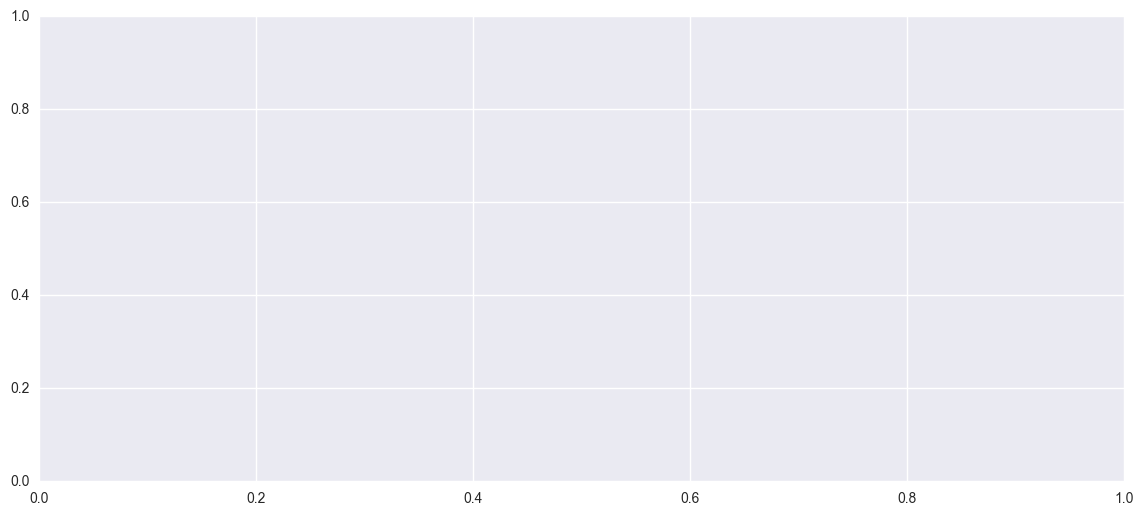

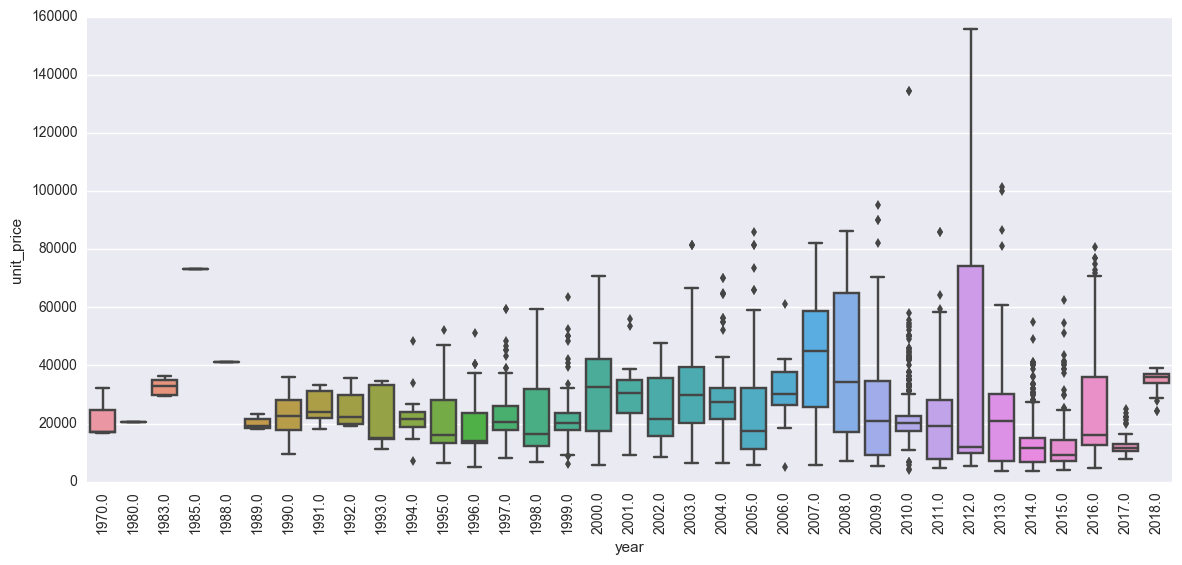

In [82]:
##  尝试下violin 
ax = plt.subplots(figsize=(14,6))
ax = sns.boxplot(x='year',y='unit_price',data=data,whis=1.5)
#ax.axis(ymax=3000)
plt.xticks(rotation=90)
plt.show()

In [69]:
_distribution = data['house_type'].value_counts()*1.0#/len(data)
# _distribution.reindex([u'商业综合体楼',u'纯写字楼',u'酒店写字楼',u'别墅',u'别墅|双拼',u'别墅|叠拼',u'别墅|独栋',u'别墅|联排',u'商住楼','商铺|专项卖场','商铺|临街门面','商铺|住宅底商','商铺|写字楼底商','商铺|商业街商铺','商铺|购物中心、百货','普通住宅','酒店式公寓'])


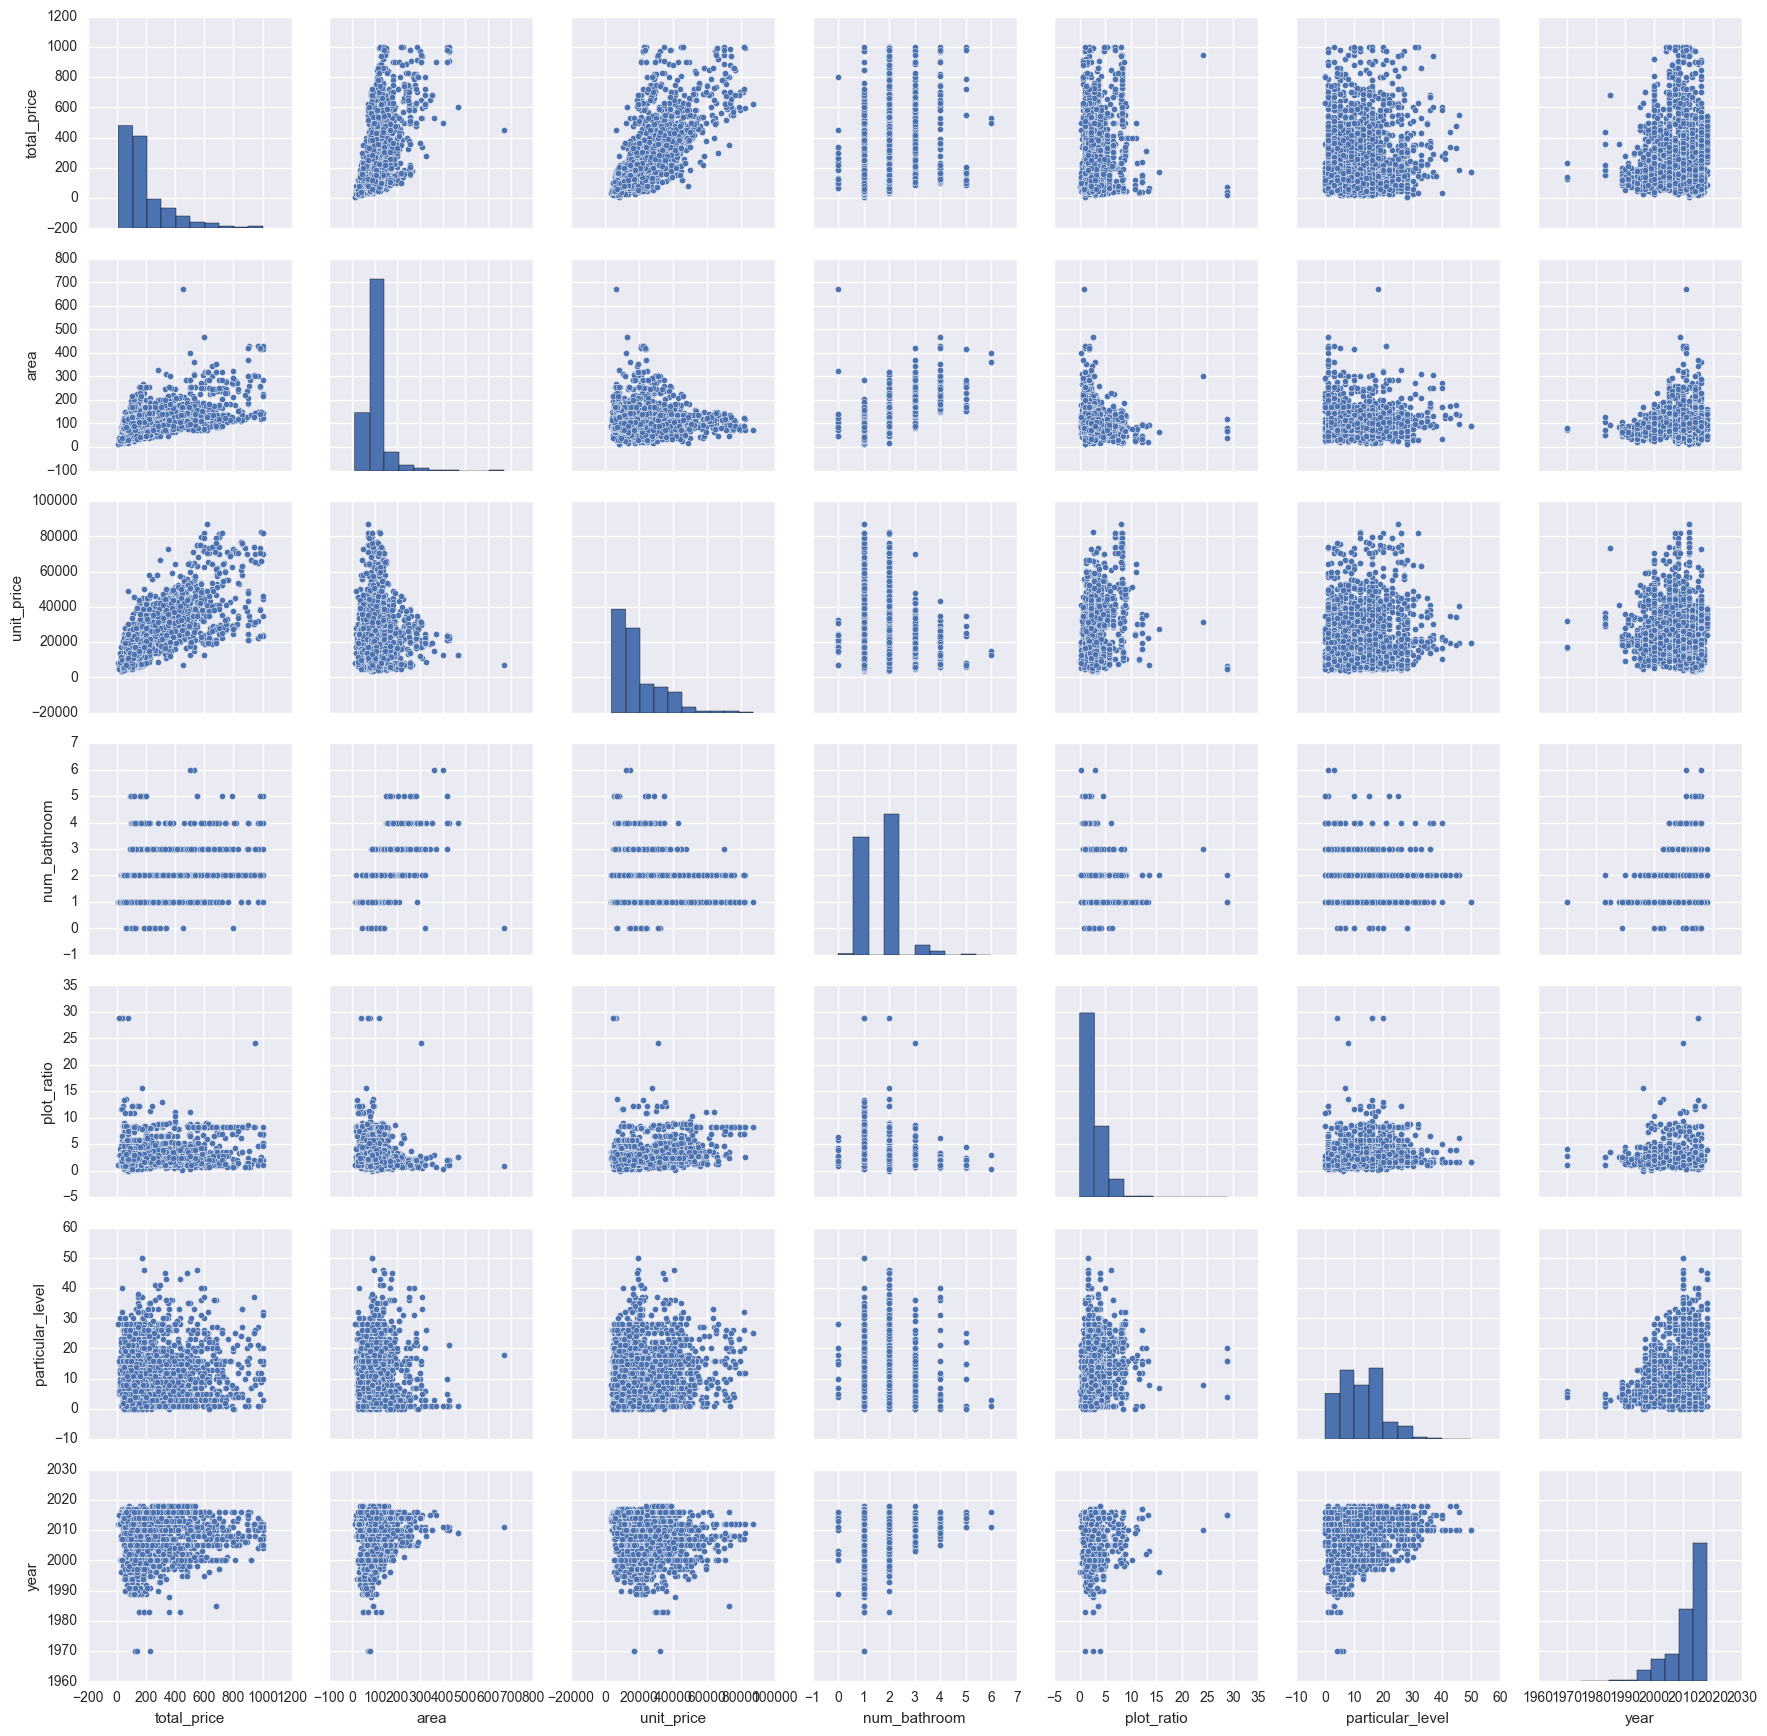

In [78]:
cols = ['total_price', 'area', 'unit_price', 'num_bathroom', 'plot_ratio', 'particular_level','year']#, 'num_bedroom','num_livingroom',
ax = sns.pairplot(data[cols][data['total_price']<=1000].dropna())
plt.show()

In [85]:
num_null = data.isnull().sum().sort_values(ascending=False)[:-1]
percentage = (num_null*1.0/data.count()).sort_values(ascending=False)[:-1]
missing_data = pd.concat([num_null,percentage],axis=1,keys=['Total','Percentage'])
missing_data = missing_data.sort_values(by='Percentage',ascending=False)
# missing_data.head(20)

In [87]:
sns.distplot(data['total_price'][data['total_price']<=1000],fit=norm)
fig = plt.figure()
res = stats.probplot(data['total_price'][data['total_price']<=1000],plot=plt)
# plt.show()

In [ ]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [ ]:
builder = data['builder'].value_counts()
prit
# builder.plot(kind='bar')
# plt.show()


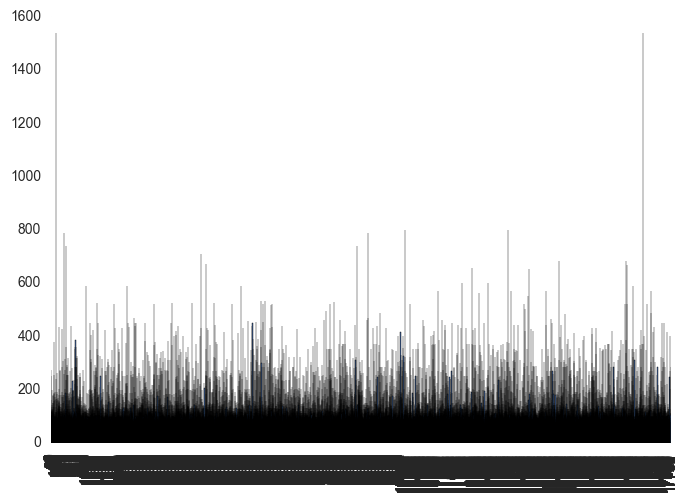

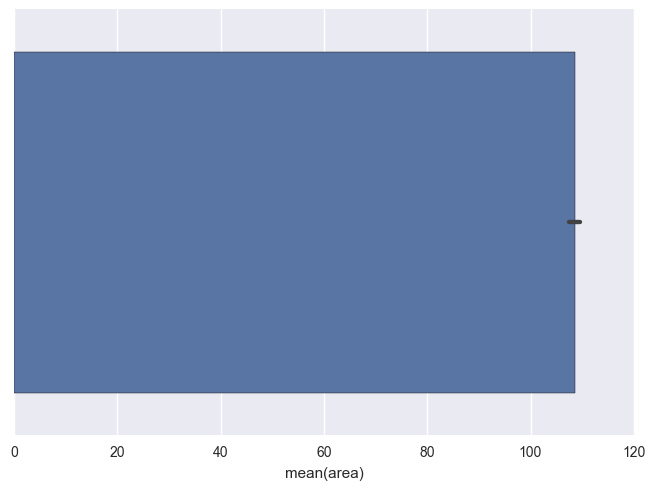

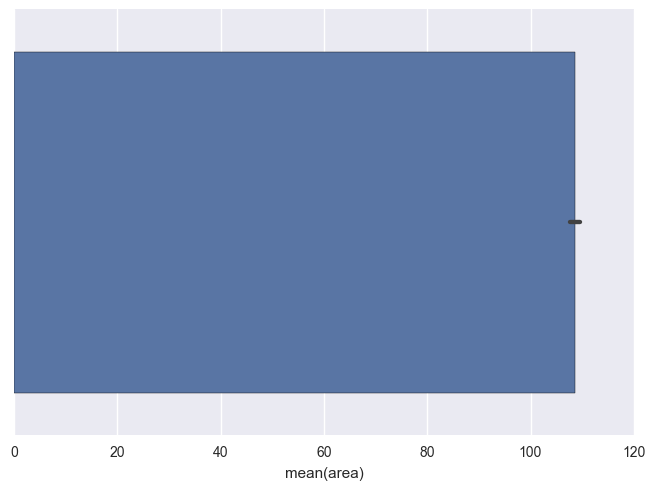

In [10]:
#面积分布
plt.figure()
sns.barplot(data['area'])
plt.show()


In [ ]:
#户型的分布
data = pd.read_csv('D:\my_documents\python\scrape\house_price\leju\house_info.csv',encoding='gbk')

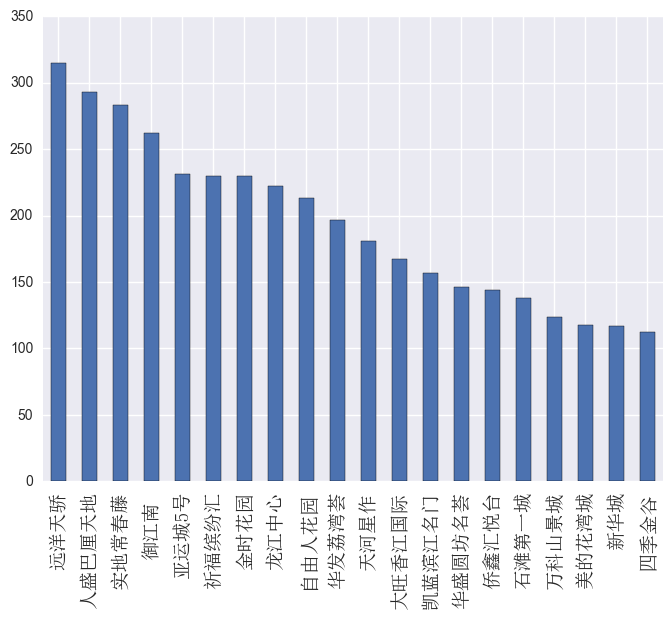

In [14]:
ax = plt.subplots(figsize=(8,6))
_comm_dist = data['community_name'].value_counts()[:20]
ax = _comm_dist.plot(kind='bar')
ax.set_xticklabels([u'远洋天骄',u'人盛巴厘天地',u'实地常春藤',u'御江南 ',u'亚运城5号',u'祈福缤纷汇',u'金时花园',u'龙江中心',u'自由人花园',u'华发荔湾荟',u'天河星作',u'大旺香江国际',u'凯蓝滨江名门',u'华盛圆坊名荟',u'侨鑫汇悦台',u'石滩第一城',u'万科山景城',u'美的花湾城',u'新华城',u'四季金谷'],fontproperties=font)
# _comm_dist.head(20)
plt.show()

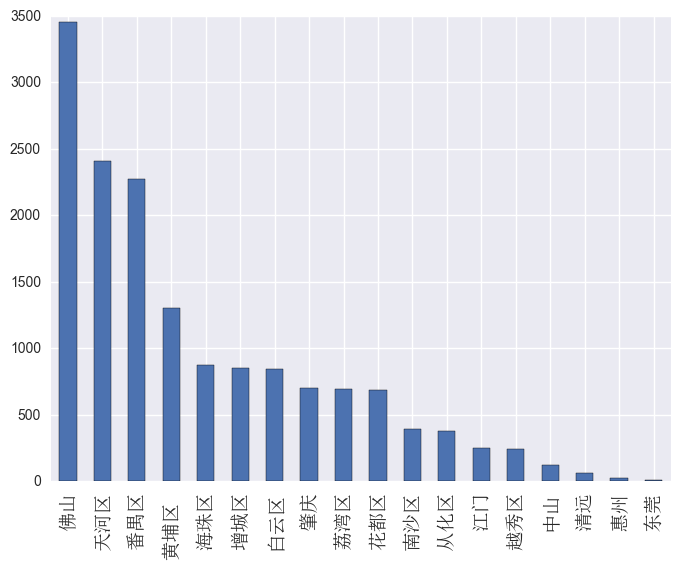

In [18]:
_district = _comm_dist = data['community_city'].value_counts()
ax = plt.subplots(figsize=(8,6))
ax = _district.plot(kind='bar')
ax.set_xticklabels([u'佛山',u'天河区',u'番禺区',u'黄埔区 ',u'海珠区',u'增城区',u'白云区',u'肇庆',u'荔湾区',u'花都区',u'南沙区',u'从化区',u'江门',u'越秀区',u'中山',u'清远',u'惠州',u'东莞'],fontproperties=font)
plt.show()

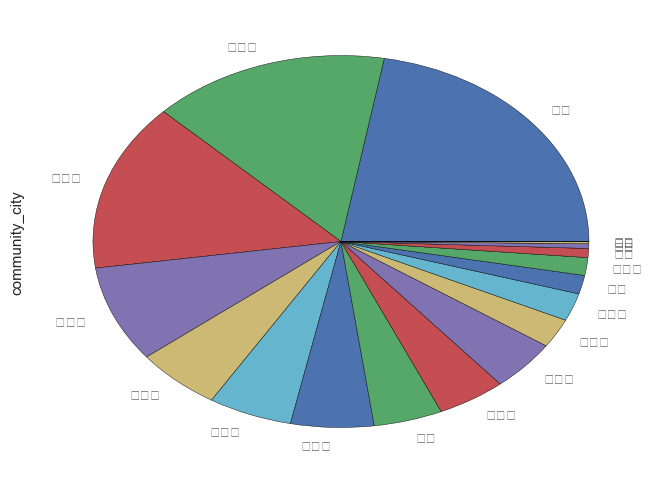

In [20]:
_district = _comm_dist = data['community_city'].value_counts()
ax = plt.subplots(figsize=(8,6))
ax = _district.plot(kind='pie',labels =[u'佛山',u'天河区',u'番禺区',u'黄埔区 ',u'海珠区',u'增城区',u'白云区',u'肇庆',u'荔湾区',u'花都区',u'南沙区',u'从化区',u'江门',u'越秀区',u'中山',u'清远',u'惠州',u'东莞'])
?ax.set_xticklabels([u'佛山',u'天河区',u'番禺区',u'黄埔区 ',u'海珠区',u'增城区',u'白云区',u'肇庆',u'荔湾区',u'花都区',u'南沙区',u'从化区',u'江门',u'越秀区',u'中山',u'清远',u'惠州',u'东莞'],fontproperties=font)
plt.show()